In [1]:
import numpy as np
from pathlib import Path
import json

folder_path = Path("grupee_data")

def load_friends(path):
    data = np.loadtxt(folder_path/"friends.csv", delimiter=',', dtype=int)
    return data

def load_concerts(path):
    with open(folder_path/"n_concerts.txt") as file:
        n_concerts = [] # is sorted the same anyway
        preference_keys = []
        for line in file:
            line = line.strip()
            key, val = line.split(':', 1)
            preference_keys.append(key)
            n_concerts.append(int(val))
        return n_concerts, preference_keys
    return None
def load_preferences(path):
    with open(folder_path/"preferences.json") as file:
        data = json.load(file)
        data = {int(k):v for k,v in data.items()}
        return data
    return None

visitation_both = 393/1000
visitation_one = 18/1000
visitation_neither = 2/1000

friends = load_friends(folder_path)
print(friends.shape)
n_concerts, preference_keys = load_concerts(folder_path)
print(n_concerts)
print(len(n_concerts))
preferences = load_preferences(folder_path)
print(preferences)
print(len(preferences))
print(len(preferences)*12/100)

(55483, 2)
[24, 23, 8, 24, 36, 38, 30, 12, 10, 3, 0, 0, 9, 14, 22, 2, 25, 9, 14, 0, 1, 8, 0, 4, 0, 0, 9, 30, 1, 60, 10, 8, 24, 29, 0, 0, 13, 15, 12, 2, 18, 40, 0, 11, 0, 0, 0, 0, 6, 1, 0, 22, 0, 0, 23, 0, 10, 6, 0, 4, 4, 0, 0, 30, 0, 8, 20, 18, 22, 1, 28, 29, 13, 2, 2, 13, 27, 12, 0, 0, 5, 18, 3, 0]
84
{0: '000000000000000000000000000000000001000000000101000000000000010001100100000000000000', 1: '000001000000000000001000000000000000000000000001000000000000000000000000000000000100', 2: '000000000000001001001000100000000001010000000111000010001000011001100000000000010100', 3: '000000000000000000000000000000000000000000000001000000000000000000000000000000000000', 4: '000000000000001001001011100000000011000000000111000000000000011001100000000000010100', 5: '000000000000000000000000000000000000000000000000000000000000000000000000000000000100', 6: '000000000000000000000000000000000000010000000000000000000000000000100000000000000000', 7: '000000000000001000001000100000000010000000000101000000

In [2]:
# for each pair how likely is it for each genre, that they will go to a concert together
pair_probabilities = {}
for i in range(friends.shape[0]):
    pair = friends[i]
    probs = []
    for k in range(len(preference_keys)):
        if preferences[pair[0]][k] == "1" and preferences[pair[1]][k] == "1":
            probs.append(visitation_both)
        elif preferences[pair[0]][k] == "1" or preferences[pair[1]][k] == "1":
            probs.append(visitation_one)
        else:
            probs.append(visitation_neither)
    pair_probabilities[tuple(pair)] = probs
    

In [3]:
# assert lengths
for k,v in pair_probabilities.items():
    if len(v) != len(preference_keys):
        print(f"ERR {k} : {v} len {len(v)} != {len(preference_keys)}")
if len(pair_probabilities) != friends.shape[0]:
    print(f"ERR {len(pair_probabilities)} != {friends.shape[0]}")

In [4]:
concert_popularity = [0 for _ in range(len(preference_keys))]
for i in range(len(preferences)): # for each person
    for j in range(len(preferences[i])): # for each genre
        if preferences[i][j] == "1":
            concert_popularity[j] += 1

sorter = np.argsort(concert_popularity)[::-1]
#concert_popularity = [concert_popularity[i] for i in sorter]
concert_popularity_keys = [preference_keys[i] for i in sorter]
for i in range(len(concert_popularity)):
    print(f"{concert_popularity_keys[i]}: {concert_popularity[i]}")

Nursery Rhymes: 16
Electro: 504
Soul & Funk: 130
Oldschool R&B: 58
Hard Rock: 44
Ranchera: 1891
Brazilian Music: 2
Romantic: 117
Indie Rock/Rock pop: 14
Asian Music: 8
Tropical: 351
Metal: 68
Grime: 1
Contemporary Soul: 2
Films/Games: 2194
Rap/Hip Hop: 2
Bollywood: 16
Baroque: 1456
Film Scores: 4
Electric Blues: 215
Dub: 1060
Contemporary R&B: 71
Classical Period: 274
Folk: 1838
Indian Music: 1747
Techno/House: 248
Indie Pop/Folk: 2
Soundtracks: 0
Kids: 1
Alternative Country: 0
Urban Cowboy: 3
West Coast: 50
Early Music: 99
Old School: 21
Latin Music: 874
Alternative: 1615
Country Blues: 2
Jazz Hip Hop: 1733
Comedy: 273
R&B: 12
Game Scores: 394
Instrumental jazz: 56
Opera: 58
Disco: 15
Sports: 0
Electro Pop/Electro Rock: 2432
International Pop: 1229
Dance: 7157
Dancefloor: 286
Dubstep: 460
Traditional Country: 1
Dirty South: 36
Country: 552
East Coast: 4
Delta Blues: 9
Pop: 0
Indie Rock: 170
Jazz: 0
Classical: 24
Trance: 5
Musicals: 70
Acoustic Blues: 3255
Kids & Family: 3505
Vocal jaz

In [5]:
def get_all_nodefriends(friends):
    nodefriends = [[] for _ in range(len(preferences))]
    for i in range(friends.shape[0]):
        nodefriends[friends[i][0]].append(friends[i][1])
        nodefriends[friends[i][1]].append(friends[i][0])
    return nodefriends

def where_will_nodes_go_together(node1, node2):
    probs = []
    for k in range(len(preference_keys)):
        if preferences[node1][k] == "1" and preferences[node2][k] == "1":
            probs.append(visitation_both)
        elif preferences[node1][k] == "1" or preferences[node2][k] == "1":
            probs.append(visitation_one)
        else:
            probs.append(visitation_neither)
    return np.array(probs)

all_nodefriends = get_all_nodefriends(friends)

all_node_probabilities = []
for node in range(len(preferences)):
    nodefriends = all_nodefriends[node]
    probs = np.array([1 for _ in range(len(preference_keys))])
    for friend in nodefriends:
        probs = probs*(1-where_will_nodes_go_together(node, friend)) # pobability that they will not go to a concert together
    # => probability that no one wants to go to with node
    probs = 1-probs # pobability that at least one person wants to go to a concert with node
    all_node_probabilities.append(probs)
all_node_probabilities = np.array(all_node_probabilities)

In [6]:
# primitive scaling by concert popularity etc
final_probs = []
for node in range(len(all_node_probabilities)):
    probs = all_node_probabilities[node]

    probs *= n_concerts
    probs *= (concert_popularity/np.sum(concert_popularity))
    prob = np.sum(probs)
    final_probs.append(prob)

sorter = np.argsort(final_probs)[::-1]
vaccinate = sorter[:int(np.ceil(len(preferences)*12/100))]
print(vaccinate)
print(len(vaccinate))
np.savetxt("vaccinate_risk_scores.txt", vaccinate, fmt='%d', delimiter=',')

[6678 2408 1612 4935 1484  284  715 4702 2242  506 3660 6713 4011 1637
 7233 1210 4113  419  469  554  312  590 5406  300  416 8095 4977 8048
  391 3897 1408 8201 6499 5443 3322   39 2435 7199 3044 2788 4017  904
 7871 7440  349 1709 3764 1805  588 5560 1526 1390 1059 7442 7261 7978
 2898 5486  835 8077  342 6167 7990 4595 4459 4183 7743 4602  102 1530
  434  430 4351 5139  878 2483 3210 5797 1837 7091 5551  642 1083 2244
 4024  149 4062 3544  714 7392 7296  425 1301  600 5277  306 3041   17
 2955 6935 5427 1002  443 5234 1504 7273  133 6568 1444 5350 1647  607
 4207 6714 5654 5762 6722 2020 2926 2947 7470 4726 7066 6378 1485  269
 3931  320 4076  991 5863  492 1315 2951  909 2477  119  444 3520 4812
  552 7354 6569 5605 8199 2826  811  182 1951 4352  732 7436 1538 4613
 1402 1197 5448  889 1010 4968 1870 4530  369  587 1947 1209 5808 2092
  249  937 5545 4682 3745 4690 4263 3550 5476 6210 5566 3386   46 1025
 4073  101 2524 7889 3575 4022 1687 2604 3509  411  682 6875 5544  387
 4591 

In [7]:
# other approach
new_edges = []
# only friends with at least one common interest
for i in range(friends.shape[0]):
    pair = friends[i]
    weight = 0
    for k in range(len(preference_keys)):
        concert_factor = 0.1
        if n_concerts[k] != 0:
            concert_factor = n_concerts[k]

        if preferences[pair[0]][k] == "1" and preferences[pair[1]][k] == "1":
            weight+=(1-visitation_both)/concert_factor
        elif preferences[pair[0]][k] == "1" or preferences[pair[1]][k] == "1":
            weight+=(1-visitation_one)/concert_factor
        else:
            weight+=(1-visitation_neither)/concert_factor
            
    new_edges.append([pair[0], pair[1], weight])
new_edges = np.array(new_edges)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
print("adding edges")
for edge in new_edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])
print("do layout")
#pos = nx.spring_layout(G, weight="weight")

adding edges
do layout


In [9]:
"""plt.figure(figsize=(200,200))
nx.draw(G, pos, with_labels=False, node_color='red', node_size=300, edge_color='black')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos)
plt.savefig("graph.png")"""

'plt.figure(figsize=(200,200))\nnx.draw(G, pos, with_labels=False, node_color=\'red\', node_size=300, edge_color=\'black\')\n#labels = nx.get_edge_attributes(G, \'weight\')\n#nx.draw_networkx_edge_labels(G, pos)\nplt.savefig("graph.png")'

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_graph(selected_nodes, name=None):
    g = nx.Graph()
    for edge in new_edges:
        g.add_edge(edge[0], edge[1], weight=edge[2])
    pos = nx.spring_layout(g, weight="weight")
    plt.figure(figsize=(200,200))
    nx.draw(g, pos, with_labels=False, node_color='red', node_size=300, edgelist=[])
    nx.draw_networkx_nodes(G, pos, nodelist=selected_nodes, node_color='blue', node_size=300)
    if name is not None:
        plt.savefig(name)
    else:
        plt.savefig("graph_plot.png")

In [11]:
import pulp

# trash
"""def max_edge_coverage(G, max_nodes):
    # ILP-Modell initialisieren
    model = pulp.LpProblem("Max_Edge_Coverage", pulp.LpMaximize)

    # Variablen für Knoten (x_u) und Kanten (y_uv)
    x = {u: pulp.LpVariable(f"x_{u}", cat="Binary") for u in G.nodes}
    y = {edge: pulp.LpVariable(f"y_{edge}", cat="Binary") for edge in G.edges}

    # Zielfunktion: Maximierung der abgedeckten Kanten
    model += pulp.lpSum(y.values()), "Maximize_Covered_Edges"

    # Nebenbedingungen: Eine Kante (u, v) kann nur abgedeckt sein, wenn u oder v im Cover ist
    for u, v in G.edges:
        model += y[(u, v)] <= x[u] + x[v]

    # Nebenbedingung: Begrenzung der Anzahl der ausgewählten Knoten
    model += pulp.lpSum(x.values()) <= max_nodes

    # Modell lösen
    model.solve()

    # Ergebnis auslesen
    selected_nodes = [u for u in G.nodes if pulp.value(x[u]) == 1]
    covered_edges = [e for e in G.edges if pulp.value(y[e]) == 1]

    return selected_nodes, covered_edges

# Maximale Kantenabdeckung berechnen
selected_nodes, covered_edges = max_edge_coverage(G, np.ceil(len(preferences)*12/100))
print("Ausgewählte Knoten:", selected_nodes)
print("Abgedeckte Kanten:", covered_edges)"""

'def max_edge_coverage(G, max_nodes):\n    # ILP-Modell initialisieren\n    model = pulp.LpProblem("Max_Edge_Coverage", pulp.LpMaximize)\n\n    # Variablen für Knoten (x_u) und Kanten (y_uv)\n    x = {u: pulp.LpVariable(f"x_{u}", cat="Binary") for u in G.nodes}\n    y = {edge: pulp.LpVariable(f"y_{edge}", cat="Binary") for edge in G.edges}\n\n    # Zielfunktion: Maximierung der abgedeckten Kanten\n    model += pulp.lpSum(y.values()), "Maximize_Covered_Edges"\n\n    # Nebenbedingungen: Eine Kante (u, v) kann nur abgedeckt sein, wenn u oder v im Cover ist\n    for u, v in G.edges:\n        model += y[(u, v)] <= x[u] + x[v]\n\n    # Nebenbedingung: Begrenzung der Anzahl der ausgewählten Knoten\n    model += pulp.lpSum(x.values()) <= max_nodes\n\n    # Modell lösen\n    model.solve()\n\n    # Ergebnis auslesen\n    selected_nodes = [u for u in G.nodes if pulp.value(x[u]) == 1]\n    covered_edges = [e for e in G.edges if pulp.value(y[e]) == 1]\n\n    return selected_nodes, covered_edges\n\n

In [ ]:
def max_node_coverage(G, max_nodes):
    # ILP-Modell initialisieren
    model = pulp.LpProblem("Max_Node_Coverage", pulp.LpMaximize)

    # Variablen für ausgewählte Knoten (x_u) und abgedeckte Knoten (z_v)
    x = {u: pulp.LpVariable(f"x_{u}", cat="Binary") for u in G.nodes}
    z = {v: pulp.LpVariable(f"z_{v}", cat="Binary") for v in G.nodes}

    # Zielfunktion: Maximierung der abgedeckten Knoten
    model += pulp.lpSum(z.values()), "Maximize_Covered_Nodes"

    # Nebenbedingungen: Ein Knoten kann nur abgedeckt sein, wenn er selbst oder einer seiner Nachbarn ausgewählt ist
    for v in G.nodes:
        neighbors = list(G.neighbors(v))
        model += z[v] <= x[v] + pulp.lpSum(x[u] for u in neighbors)

    # Nebenbedingung: Begrenzung der Anzahl der ausgewählten Knoten
    model += pulp.lpSum(x.values()) <= max_nodes

    # Modell lösen
    model.solve()

    # Ergebnis auslesen
    selected_nodes = [u for u in G.nodes if pulp.value(x[u]) == 1]
    covered_nodes = [v for v in G.nodes if pulp.value(z[v]) == 1]

    return selected_nodes, covered_nodes
# Maximale Kantenabdeckung berechnen
selected_nodes, covered_edges = max_node_coverage(G, np.ceil(len(preferences)*12/100))
print("Ausgewählte Knoten:", selected_nodes)
print("Abgedeckte Kanten:", covered_edges)
with open("vaccinate_vertex_ilp_nodes_cover.txt", "w") as file:
    for node in selected_nodes:
        file.write(f"{int(node)}\n")

In [ ]:
def compare_vac_ids(file1,file2):
    with open(file1) as file1:
        with open(file2) as file2:
            vac1 = [int(a) for a in file1.read().split()]
            vac2 = [int(a) for a in file2.read().split()]
            overlap = 0
            for v in vac1:
                if v in vac2:
                    overlap += 1
            return overlap
# comparing the overlaps with other groups
names = ["risk", "ilp_edges", "ilp_nodes", "greedy"]
files = ["vaccinate_risk_scores.txt", "vaccinate_vertex_ilp.txt", "vaccinate_vertex_ilp_nodes_cover.txt", "vaccinate_vertex_greedy.txt"]
print(f"{" ".center(10," ")} | {names[0].center(10," ")} | {names[1].center(10," ")} | {names[2].center(10," ")} | {names[3].center(10," ")}")
for y in range(len(files)):
    print(f"{names[y].center(10, ' ')}", end=" | ")
    for x in files:
        comp = compare_vac_ids(x, files[y])
        print(f"{comp}".center(10," "), end=" | ")
    print()

           |    risk    | ilp_edges  | ilp_nodes  |   greedy  
   risk    |    998     |    275     |    139     |    260     | 
ilp_edges  |    275     |    998     |    268     |    796     | 
ilp_nodes  |    139     |    268     |    992     |    219     | 
  greedy   |    260     |    796     |    219     |    998     | 


In [ ]:
def count_covered_nodes(G, selected_nodes):
    covered_nodes = set(selected_nodes)
    
    for node in selected_nodes:
        neighbors = list(G.neighbors(node))
        covered_nodes.update(neighbors)
    
    return len(covered_nodes)

def load_vaccinated(file):
    with open(file) as file:
        return [int(a) for a in file.read().split()]

print(f"{names[0].center(10," ")} | {names[1].center(10," ")} | {names[2].center(10," ")} | {names[3].center(10," ")}")
print(f"{count_covered_nodes(G,load_vaccinated(files[0]))}".center(10, " "), end=" | ")
print(f"{count_covered_nodes(G,load_vaccinated(files[1]))}".center(10, " "), end=" | ")
print(f"{count_covered_nodes(G,load_vaccinated(files[2]))}".center(10, " "), end=" | ")
print(f"{count_covered_nodes(G,load_vaccinated(files[3]))}".center(10, " "), end=" | ")


   risk    | ilp_edges  | ilp_nodes  |   greedy  
   6491    |    7678    |    8311    |    7206    | 

In [ ]:
plot_graph(load_vaccinated(files[0]), "vaccinate_risk_scores.png")
plot_graph(load_vaccinated(files[1]), "vaccinate_vertex_ilp.png")
plot_graph(load_vaccinated(files[2]), "vaccinate_vertex_ilp_nodes_cover.png")
plot_graph(load_vaccinated(files[3]), "vaccinate_vertex_greedy.png")

In [ ]:
vertex = load_vaccinated("vaccinate_vertex_ilp_nodes_cover.txt")
add_nums = [69, 666, 8174, 2729, 0, 8310]
vertex = vertex + add_nums
with open("vaccinate_vertex_ilp_nodes_cover+6.txt", "w") as file:
    for node in vertex:
        file.write(f"{int(node)}\n")

In [92]:
print(compare_vac_ids("Abgaben/a_team_9.txt", "vaccinated_users_by_cluster_GMM.txt"))
print(compare_vac_ids("Abgaben/b_team_9.txt", "vaccinate_vertex_ilp_nodes_cover+6.txt"))

586
998


In [37]:
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh

A = nx.adjacency_matrix(G)
nx.laplacian_matrix(G)
L = laplacian(A, normed=True)

k = 3
eigvals, eigvecs = eigsh(L, k=k+1, which='SM')

embeddings = eigvecs[:, 1:]
print(embeddings.shape)

(8311, 3)


In [61]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.001, min_samples=5)
clusters = dbscan.fit_predict(embeddings)
print(np.unique(clusters).shape)

(50,)


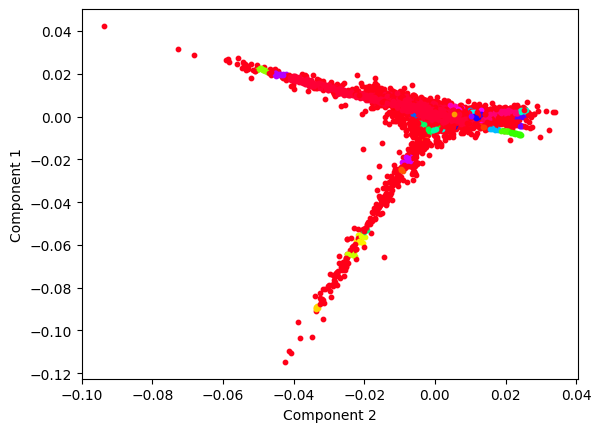

In [ ]:
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=-1, vmax=np.unique(clusters)[-1])

"""fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(len(embeddings)):
    ax.scatter(embeddings[i, 0], embeddings[i, 1], embeddings[i, 2], s=10, c=clusters[i], cmap=cmap, norm=norm)
#for cluster_label in set(clusters):
#    cluster_points = embeddings[clusters == cluster_label]
#    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_label}")

ax.set_title("3D Visualisierung der Embeddings mit DBSCAN Clustering")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()
plt.show()"""

for x in range(3):
    for y in range(3):
            if x == y:
                continue
            if x > 1 or y > 0:
                continue
            fig = plt.figure()
            ax = fig.add_subplot(111)
            for i in range(len(embeddings)):
                ax.scatter(embeddings[i, x], embeddings[i, y], s=10, c=clusters[i], cmap=cmap, norm=norm)
            ax.set_xlabel(f"Component {x+1}")
            ax.set_ylabel(f"Component {y+1}")
            plt.show()

In [96]:
import numpy as np
from pathlib import Path
import json

folder_path = Path("grupee_data")

def load_friends(path):
    data = np.loadtxt(folder_path/"friends.csv", delimiter=',', dtype=int)
    return data

def load_concerts(path):
    with open(folder_path/"n_concerts.txt") as file:
        n_concerts = [] # is sorted the same anyway
        preference_keys = []
        for line in file:
            line = line.strip()
            key, val = line.split(':', 1)
            preference_keys.append(key)
            n_concerts.append(int(val))
        return n_concerts, preference_keys
    return None
def load_preferences(path):
    with open(folder_path/"preferences.json") as file:
        data = json.load(file)
        data = {int(k):v for k,v in data.items()}
        return data
    return None

visitation_both = 393/1000
visitation_one = 18/1000
visitation_neither = 2/1000

friends = load_friends(folder_path)
n_concerts, preference_keys = load_concerts(folder_path)
preferences = load_preferences(folder_path)


vaccinate= []
for twelve in range(998):
    print("vac", twelve)
    #print(vaccinate)
    #print(len(friends))
    # for each pair how likely is it for each genre, that they will go to a concert together
    deleteids = []
    for vac in vaccinate:
        preferences.pop(vac, None)
        notdeleted = True
        for abc in range(friends.shape[0]):
            if friends[abc][0] == vac or friends[abc][1] == vac:
                deleteids.append(abc)
    friends = np.delete(friends, deleteids, axis=0)
        
    pair_probabilities = {}
    for i in range(friends.shape[0]):
        pair = friends[i]
        probs = []
        try:
            for k in range(len(preference_keys)):
                if preferences[pair[0]][k] == "1" and preferences[pair[1]][k] == "1":
                    probs.append(visitation_both)
                elif preferences[pair[0]][k] == "1" or preferences[pair[1]][k] == "1":
                    probs.append(visitation_one)
                else:
                    probs.append(visitation_neither)
        except:
            print(pair)
            raise Exception()
        pair_probabilities[tuple(pair)] = probs


    concert_popularity = [0 for _ in range(len(preference_keys))]
    for i in list(preferences.keys()): # for each person
        for j in range(len(n_concerts)): # for each genre
            if preferences[i][j] == "1":
                concert_popularity[j] += 1

    sorter = np.argsort(concert_popularity)[::-1]
    #concert_popularity = [concert_popularity[i] for i in sorter]
    concert_popularity_keys = [preference_keys[i] for i in sorter]
    #for i in range(len(concert_popularity)):
        #print(f"{concert_popularity_keys[i]}: {concert_popularity[i]}")


    def get_all_nodefriends(friends):
        nodefriends = [[] for _ in range(8311)]
        for i in range(friends.shape[0]):
            nodefriends[friends[i][0]].append(friends[i][1])
            nodefriends[friends[i][1]].append(friends[i][0])
        return nodefriends

    def where_will_nodes_go_together(node1, node2):
        probs = []
        for k in range(len(preference_keys)):
            if preferences[node1][k] == "1" and preferences[node2][k] == "1":
                probs.append(visitation_both)
            elif preferences[node1][k] == "1" or preferences[node2][k] == "1":
                probs.append(visitation_one)
            else:
                probs.append(visitation_neither)
        return np.array(probs)

    all_nodefriends = get_all_nodefriends(friends)

    all_node_probabilities = []
    for node in range(len(preferences)):
        nodefriends = all_nodefriends[node]
        probs = np.array([1 for _ in range(len(preference_keys))])
        for friend in nodefriends:
            probs = probs*(1-where_will_nodes_go_together(node, friend)) # pobability that they will not go to a concert together
        # => probability that no one wants to go to with node
        probs = 1-probs # pobability that at least one person wants to go to a concert with node
        all_node_probabilities.append(probs)
    all_node_probabilities = np.array(all_node_probabilities)


    # primitive scaling by concert popularity etc
    final_probs = []
    for node in range(len(all_node_probabilities)):
        probs = all_node_probabilities[node]

        probs *= n_concerts
        probs *= (concert_popularity/np.sum(concert_popularity))
        prob = np.sum(probs)
        final_probs.append(prob)

    sorter = np.argsort(final_probs)[::-1]
    vaccinate.append(sorter[0])

vac 0
vac 1
vac 2
vac 3
vac 4
vac 5
vac 6
vac 7
vac 8
vac 9
vac 10
vac 11
vac 12
vac 13
vac 14
vac 15
vac 16
vac 17
vac 18
vac 19
vac 20
vac 21
vac 22
vac 23
vac 24
vac 25
vac 26
vac 27
vac 28
vac 29
vac 30
vac 31
vac 32
vac 33
vac 34
vac 35
vac 36
vac 37
vac 38
vac 39
vac 40
vac 41
vac 42
vac 43
vac 44
vac 45
vac 46
vac 47
vac 48
vac 49
vac 50
vac 51
vac 52
vac 53
vac 54
vac 55
vac 56
vac 57
vac 58
vac 59
vac 60
vac 61
vac 62
vac 63
vac 64
vac 65
vac 66
vac 67
vac 68
vac 69
vac 70
vac 71
vac 72
vac 73
vac 74
vac 75
vac 76
vac 77
vac 78
vac 79
vac 80
vac 81
vac 82
vac 83
vac 84
vac 85
vac 86
vac 87
vac 88
vac 89
vac 90
vac 91
vac 92
vac 93
vac 94
vac 95
vac 96
vac 97
vac 98
vac 99
vac 100
vac 101
vac 102
vac 103
vac 104
vac 105
vac 106
vac 107
vac 108
vac 109
vac 110
vac 111
vac 112
vac 113
vac 114
vac 115
vac 116
vac 117
vac 118
vac 119
vac 120
vac 121
vac 122
vac 123
vac 124
vac 125
vac 126
vac 127
vac 128
vac 129
vac 130
vac 131
vac 132
vac 133
vac 134
vac 135
vac 136
vac 137
vac 13

In [97]:
np.savetxt("vaccinate_risk_scores_iteratively.txt", vaccinate, fmt='%d', delimiter=',')
print(vaccinate)

[np.int64(6678), np.int64(2408), np.int64(1612), np.int64(1484), np.int64(284), np.int64(715), np.int64(4935), np.int64(2242), np.int64(506), np.int64(3660), np.int64(4011), np.int64(1637), np.int64(7233), np.int64(4113), np.int64(1210), np.int64(419), np.int64(469), np.int64(554), np.int64(312), np.int64(590), np.int64(5406), np.int64(300), np.int64(416), np.int64(4977), np.int64(8048), np.int64(391), np.int64(3897), np.int64(1408), np.int64(4702), np.int64(6713), np.int64(5443), np.int64(6499), np.int64(3322), np.int64(39), np.int64(8201), np.int64(3044), np.int64(2435), np.int64(904), np.int64(7871), np.int64(349), np.int64(1709), np.int64(8095), np.int64(4017), np.int64(3764), np.int64(588), np.int64(1805), np.int64(2788), np.int64(1390), np.int64(1059), np.int64(7261), np.int64(7978), np.int64(835), np.int64(6167), np.int64(1526), np.int64(7440), np.int64(4595), np.int64(4183), np.int64(4459), np.int64(1530), np.int64(434), np.int64(5560), np.int64(430), np.int64(4351), np.int64(8

In [ ]:
compare_vac_ids("vaccinate_risk_scores.txt", "vaccinate_risk_scores_iteratively.txt")